# Cho dữ liệu interest Python Programming Language 5 năm tính đến 18/08/2019 trong tập tin python_programming_language_new.csv.
* Thực hiện việc dự báo interest sử dụng thuật toán ARIMA
* Cho biết trong 3 tháng sau 5 năm trên thì interest như thế nào?

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("File/python_programming_language_new.csv", index_col=0)
data.head()

,Interest
Week,
8/31/2014,49
9/7/2014,63
9/14/2014,52
9/21/2014,60
9/28/2014,77


In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data.index

DatetimeIndex(['2014-08-31', '2014-09-07', '2014-09-14', '2014-09-21',
               '2014-09-28', '2014-10-05', '2014-10-12', '2014-10-19',
               '2014-10-26', '2014-11-02',
               ...
               '2019-06-16', '2019-06-23', '2019-06-30', '2019-07-07',
               '2019-07-14', '2019-07-21', '2019-07-28', '2019-08-04',
               '2019-08-11', '2019-08-18'],
              dtype='datetime64[ns]', name='Week', length=260, freq=None)

In [6]:
data.head()

,Interest
Week,
2014-08-31,49
2014-09-07,63
2014-09-14,52
2014-09-21,60
2014-09-28,77


In [7]:
from datetime import datetime
import matplotlib.pyplot as plt

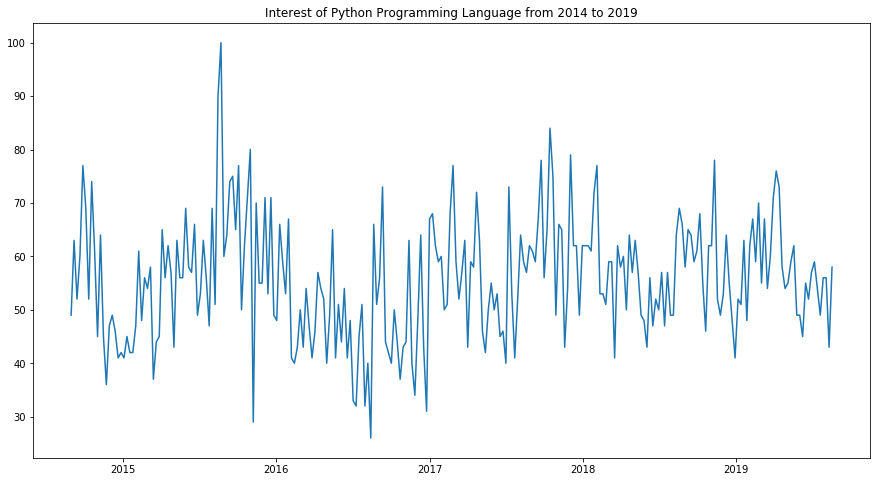

In [8]:
plt.figure(figsize=(15,8))
plt.plot(data)
plt.title("Interest of Python Programming Language from 2014 to 2019")
plt.show()

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x = data, model='multiplicative')
result

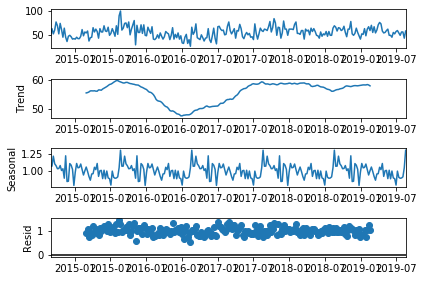

In [11]:
result.plot()
plt.show()

In [12]:
result1 = seasonal_decompose(x = data, model='additive')
result1

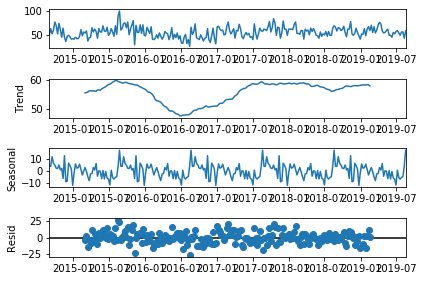

In [13]:
result1.plot()
plt.show()

In [14]:
from pmdarima.arima import auto_arima

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [15]:
stepwise_model = auto_arima(data, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=52,
                           seasonal=True,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 52); AIC=1638.336, BIC=1661.665, Fit time=17.514 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=1813.367, BIC=1820.032, Fit time=0.369 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=1723.781, BIC=1737.112, Fit time=3.889 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=1635.262, BIC=1648.593, Fit time=9.625 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=1634.136, BIC=1650.799, Fit time=13.772 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=1660.329, BIC=1673.660, Fit time=4.969 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=1634.699, BIC=1654.696, Fit time=54.490 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=1712.759, BIC=1722.758, Fit time=0.702 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 52); AIC=1635.463, BIC=1658.792, Fit time=28.840 seconds
Fit ARIMA: order=(1, 1, 

In [16]:
print(stepwise_model.aic())

1633.46377890833


In [17]:
data.head()

,Interest
Week,
2014-08-31,49
2014-09-07,63
2014-09-14,52
2014-09-21,60
2014-09-28,77


In [18]:
train = data.loc['2014-08-31':'2018-06-01']
test = data.loc['2018-06-01':]

In [19]:
train.shape

(196, 1)

In [20]:
test.shape

(64, 1)

In [21]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 1, 1, 52), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [22]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [23]:
future_forecast

array([52.75467225, 53.802862  , 56.88241145, 45.96975379, 45.57370414,
       57.49666317, 51.14550443, 43.65903679, 57.99435807, 48.25062448,
       72.70167376, 84.92299265, 55.9454739 , 57.95218463, 68.17603744,
       65.32838163, 58.61569574, 62.63351963, 48.27829931, 58.0085883 ,
       62.44402596, 65.39709354, 30.94596324, 64.62246032, 46.16321693,
       46.5405754 , 65.38365025, 51.35636814, 61.33202662, 40.63741281,
       48.32671591, 60.87462262, 55.08855582, 49.98512824, 62.01414359,
       41.55992316, 36.75110623, 40.66623467, 46.68272525, 40.17384628,
       48.76697063, 39.77696211, 40.84338783, 38.49151178, 49.97924878,
       44.78915355, 48.95368791, 38.58339237, 41.77231281, 51.79594914,
       33.9568063 , 40.34985819, 36.50423069, 44.32497646, 33.51767393,
       37.69980569, 25.45831404, 31.43783676, 36.76584348, 38.25048747,
       27.3834764 , 34.33039779, 25.25399477, 55.24235538])

In [24]:
future_forecast = pd.DataFrame(future_forecast,
                               index = test.index,
                               columns=['Prediction'])

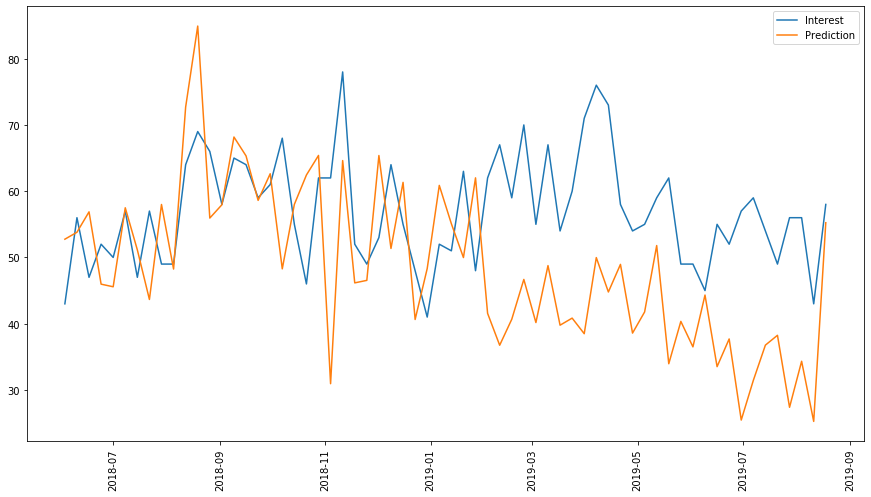

In [25]:
plt.figure(figsize=(15,8))
plt.plot(test, label='Interest')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

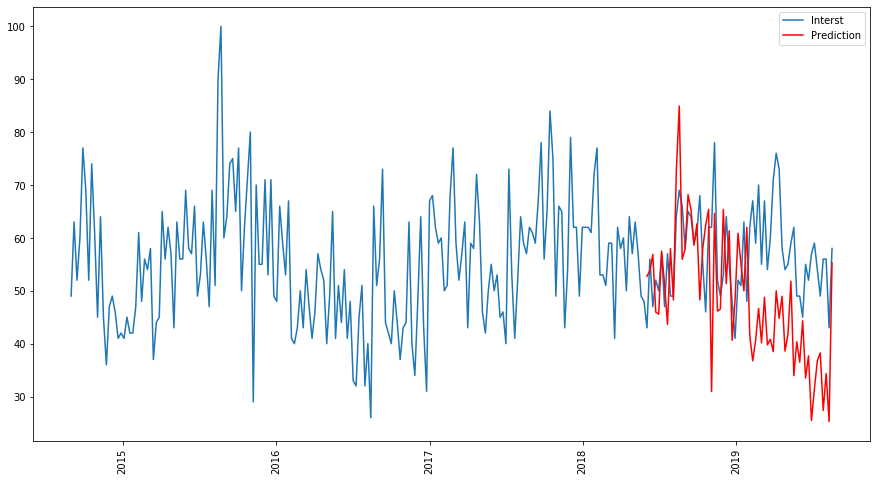

In [26]:
plt.figure(figsize=(15,8))
plt.plot(data, label='Interst')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

Predict next 3 months

In [27]:
future_forecast = stepwise_model.predict(n_periods=len(test)+3)
future_forecast

array([52.75467225, 53.802862  , 56.88241145, 45.96975379, 45.57370414,
       57.49666317, 51.14550443, 43.65903679, 57.99435807, 48.25062448,
       72.70167376, 84.92299265, 55.9454739 , 57.95218463, 68.17603744,
       65.32838163, 58.61569574, 62.63351963, 48.27829931, 58.0085883 ,
       62.44402596, 65.39709354, 30.94596324, 64.62246032, 46.16321693,
       46.5405754 , 65.38365025, 51.35636814, 61.33202662, 40.63741281,
       48.32671591, 60.87462262, 55.08855582, 49.98512824, 62.01414359,
       41.55992316, 36.75110623, 40.66623467, 46.68272525, 40.17384628,
       48.76697063, 39.77696211, 40.84338783, 38.49151178, 49.97924878,
       44.78915355, 48.95368791, 38.58339237, 41.77231281, 51.79594914,
       33.9568063 , 40.34985819, 36.50423069, 44.32497646, 33.51767393,
       37.69980569, 25.45831404, 31.43783676, 36.76584348, 38.25048747,
       27.3834764 , 34.33039779, 25.25399477, 55.24235538, 42.33033775,
       45.86700556, 58.78593722])

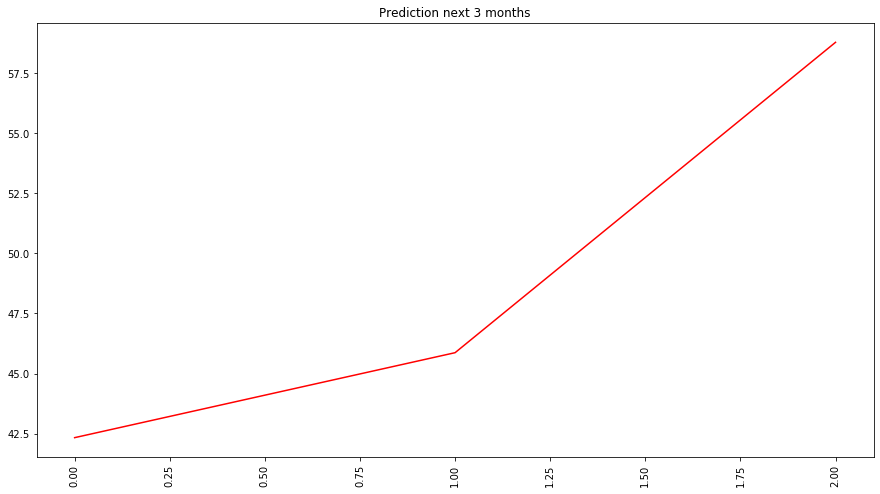

In [28]:
plt.figure(figsize=(15,8))
plt.plot(future_forecast[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 3 months")
plt.show()